# Thera Bank Personal Loan Campaign

# Context: 
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget. 

# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans. 

# Dataset:

*ID: Customer ID<br>
*Age: Customer's age in completed years<br>
*Experience: #years of professional experience<br>
*Income: Annual income of the customer (thousands)<br>
*ZIP Code: Home Address ZIP code.<br>
*Family: Family size of the customer<br>
*CCAvg: Avg. spending on credit cards per month (thousands)<br>
*Education: Education Level. 1: Undergrad; 2: Graduate; 3:  Advanced/Professional<br>
*Mortgage: Value of house mortgage if any. (thousands)<br>
*Personal Loan: Did this customer accept the personal loan offered in the last campaign?<br>
*Securities Account: Does the customer have a securities account with the bank?<br>
*CD Account: Does the customer have a certificate of deposit (CD) account with the bank?<br>
*Online: Does the customer use internet banking facilities?<br>
*Credit card: Does the customer use a credit card issued by the bank<br>

**Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import os,sys
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
#Import Datasets
pdata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# drop ID column
pdata = pdata.drop('ID', axis =1 ) 

In [5]:
#Check data type
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [6]:
#Shape
pdata.shape

(5000, 13)

In [7]:
#Statistical Summary
pdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [8]:
#Null Values or incorrect imputations
pdata.isnull().values.any()

False

In [9]:
pdata.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 2. Study the data distribution in each attribute and target variable

In [10]:
#Convert data types to categories as appropriate
pdata['Education'] = pdata['Education'].astype('category')
pdata['Personal Loan'] = pdata['Personal Loan'].astype('category')
pdata['Securities Account'] = pdata['Securities Account'].astype('category')
pdata['CD Account'] = pdata['CD Account'].astype('category')
pdata['Online'] = pdata['Online'].astype('category')
pdata['CreditCard'] = pdata['Online'].astype('category')
pdata['Family'] = pdata['Family'].astype('category')
pdata['ZIP Code'] = pdata['ZIP Code'].astype('category')

In [11]:
# See distrubtion of target variable
pdata['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [12]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
#Data is imbalanced
prop_Y = pdata['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [13]:
pdata.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.132301,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


In [14]:
pdata.groupby(["Personal Loan"]).median()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.0,20.0,59.0,1.4,0.0
1,45.0,20.0,142.5,3.8,0.0


In [15]:
#Number of unique in each column
for i in list(pdata.columns):
    print (i, pdata[i].nunique())

Age 45
Experience 47
Income 162
ZIP Code 467
Family 4
CCAvg 108
Education 3
Mortgage 347
Personal Loan 2
Securities Account 2
CD Account 2
Online 2
CreditCard 2


In [16]:
#Number of people with zero mortgage
seriesObj = pdata.apply(lambda x: True if x['Mortgage'] == 0 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)
print('Number of People with zero Mortgage:', numOfRows)

Number of People with zero Mortgage: 3462


In [17]:
#Number of people with zero credit card spending per month
seriesObj = pdata.apply(lambda x: True if x['CCAvg'] == 0 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)
print('Number of People with zero Credit Card Spending:', numOfRows)

Number of People with zero Credit Card Spending: 106


In [18]:
pdata.skew()
#zip code is highly skewed

Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard            -0.394785
dtype: float64

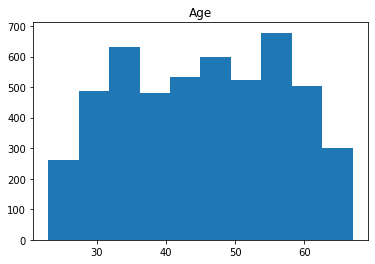

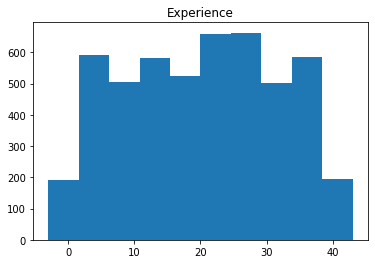

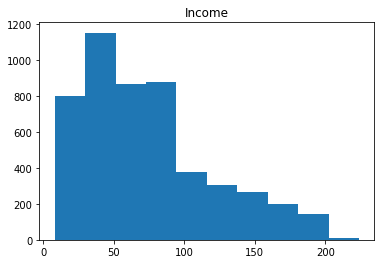

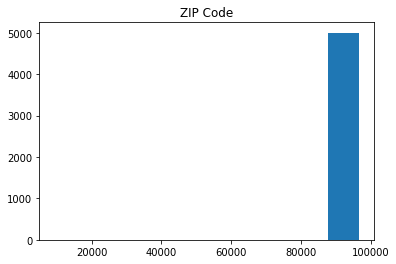

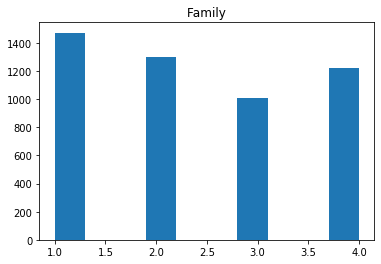

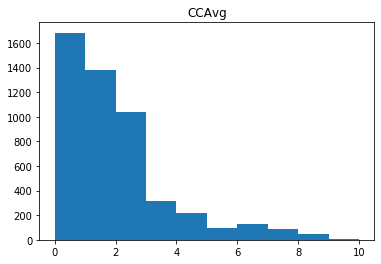

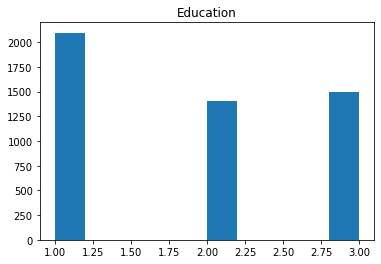

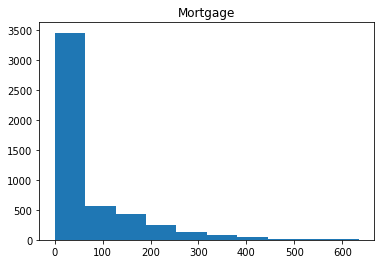

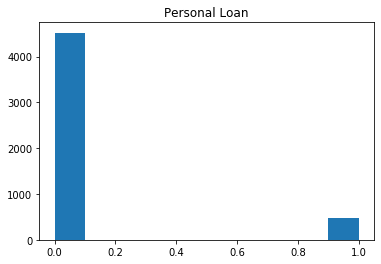

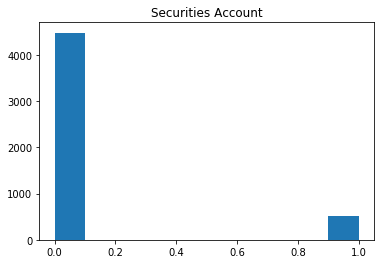

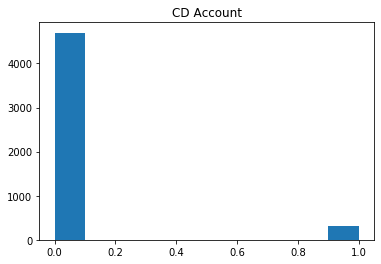

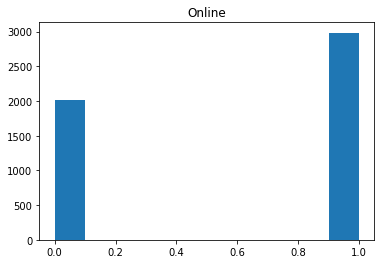

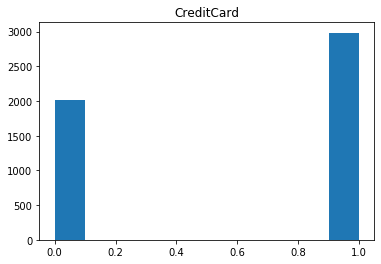

In [19]:
#Univariate and Bivariate
for i in list(pdata.columns):
    plt.hist(pdata[i])
    plt.title(i)
    plt.show()

In [20]:
pdata.corr()

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.994215,-0.055269,-0.052012,-0.012539
Experience,0.994215,1.000000,-0.046574,-0.050077,-0.010582
Income,-0.055269,-0.046574,1.000000,0.645984,0.206806
CCAvg,-0.052012,-0.050077,0.645984,1.000000,0.109905
Mortgage,-0.012539,-0.010582,0.206806,0.109905,1.000000


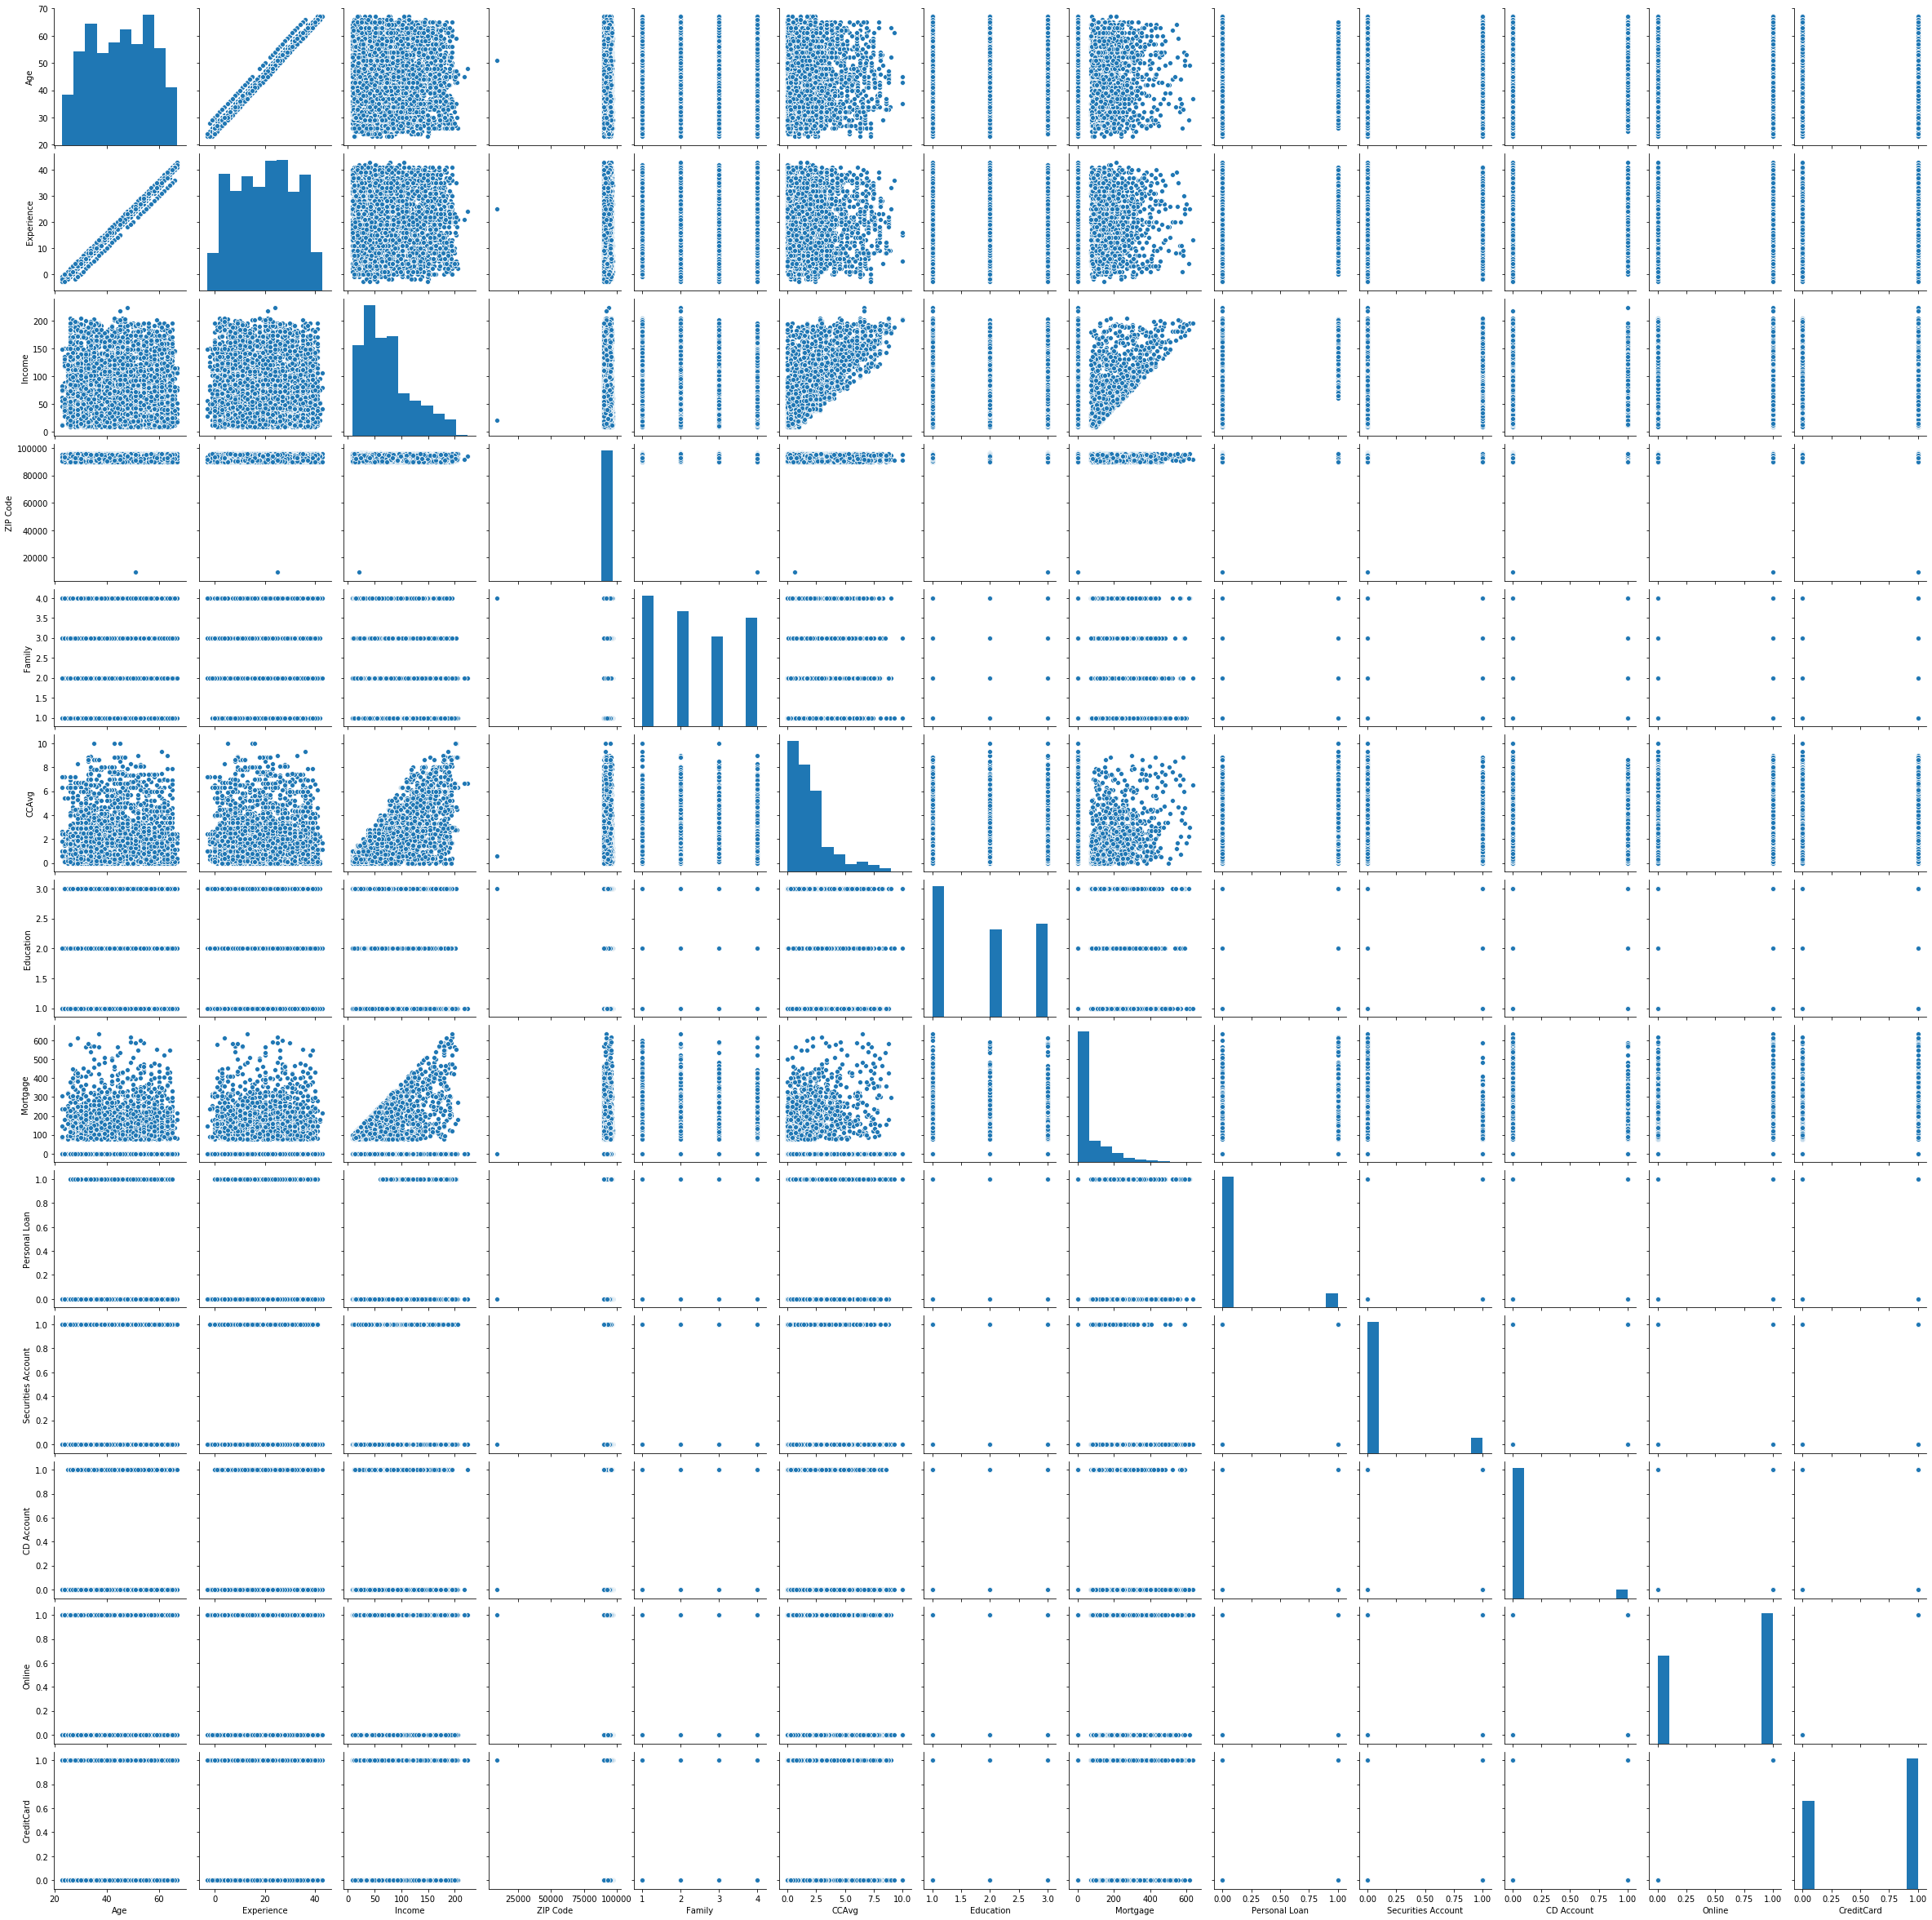

In [21]:
sns.pairplot(pdata)
plt.show()
#High degree of correlation found between and age and experience. need to drop one of them.
#High degree of correlation found between Online and CreditCard, need to drop one of them

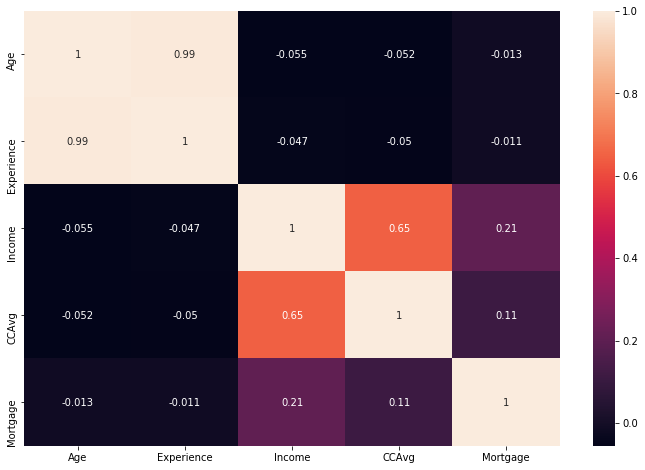

In [22]:
corr = pdata.drop('Personal Loan',axis=1).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.show()

In [23]:
# Age and Experience are highly correlated. Drop Experience
pdata = pdata.drop('Experience', axis =1 )

# Online and CreditCard are highly correlated. Drop Online
pdata = pdata.drop('Online', axis =1 )
pdata.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0


In [24]:
#Get data model ready

In [25]:
#Drop Zip Code (didn't help the model when included)
pdata = pdata.drop('ZIP Code', axis =1 ) 
pdata.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0
1,45,34,3,1.5,1,0,0,1,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0


In [28]:
# Define X and Y variables
X = pdata.drop('Personal Loan', axis=1)
Y = pdata[['Personal Loan']]

In [29]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# 3. Split the data into training and test set in the ratio of 70:30 respectively

In [30]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

X_train.head()

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,CreditCard_1
1334,47,35,1.3,0,1,0,0,0,0,0,0,1
4768,38,39,2.0,0,0,0,0,1,0,0,0,1
65,59,131,3.8,0,0,0,0,0,0,0,0,1
177,29,65,1.8,244,0,0,1,1,0,0,0,0
4489,39,21,0.2,0,0,1,0,1,0,0,0,1


In [31]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [32]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 1]), (len(pdata.loc[pdata['Personal Loan'] == 1])/len(pdata.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 0]), (len(pdata.loc[pdata['Personal Loan'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train['Personal Loan'] == 1]), (len(y_train[y_train['Personal Loan'] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train['Personal Loan'] == 0]), (len(y_train[y_train['Personal Loan'] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test['Personal Loan'] == 1]), (len(y_test[y_test['Personal Loan'] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test['Personal Loan'] == 0]), (len(y_test[y_test['Personal Loan'] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



# 4. Use logistic regression model to predict whether the customer will take personal loan or not. Print all the metrics related to evaluating the model performance

In [33]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_predict = logreg.predict(X_test)

In [35]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.96

Testing accuracy 0.9533333333333334

Confusion Matrix


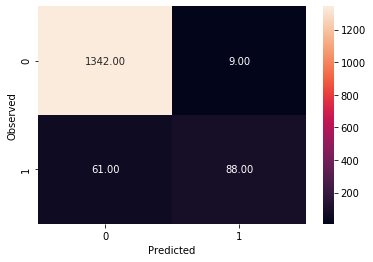

None

Recall: 0.5906040268456376

Precision: 0.9072164948453608

F1 Score: 0.7154471544715447

Roc Auc Score: 0.7919711473976523


In [36]:
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

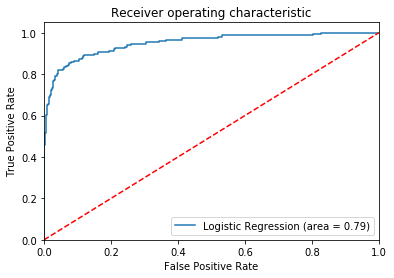

In [37]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 5. Give your reasoning on how can the model perform better

In [38]:
#Since the objective of the model is to identify potential accounts that can be convereted to Personal Loans
#high recall is desired (i.e. err on the side of False Positives)

In [39]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [40]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 1,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.961, 0.96, 0.959, 0.897, 0.896]

[0.953, 0.953, 0.951, 0.893, 0.891]


In [41]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 1,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.961, 0.896]

[0.953, 0.891]


# 6. Give business understanding of your model

In [ ]:
## Choose L2 and newton-cg

In [42]:
model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg')

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Training accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Training accuracy 0.9605714285714285

Testing accuracy 0.9533333333333334


In [43]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.925, 0.953, 0.958, 0.959, 0.96, 0.961]

[0.924, 0.943, 0.948, 0.953, 0.953, 0.953]


Training accuracy 0.9128571428571428

Testing accuracy 0.912

Confusion Matrix


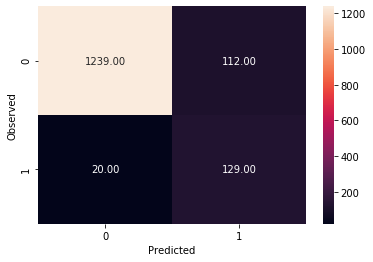

None

Recall: 0.8657718120805369

Precision: 0.5352697095435685

F1 Score: 0.6615384615384615

Roc Auc Score: 0.891435128838196


In [44]:
#final model
model = LogisticRegression(random_state=42, penalty='l2', solver='newton-cg', class_weight='balanced', C=1) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Training accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# Confusion matrix summary and business understanding:

True Positive (observed=1,predicted=1):

Correctly predicted that this customer is more likely to take a personal loan

False Positive (observed=0,predicted=1):

Incorrectly predicted that a customer is likely to take a personal loan

True Negative (observed=0,predicted=0):

Correctly predicted that a customer is not likely to take a personal loan

False Negative (observed=1,predicted=0):

Incorrectly predicted that a customer is not likely to take a personal loan

Here the bank wants to identify customers who are more likely to take a personal loan i.e. high true positive and less number of False Negative is desired (high recall), if FN is high bank would lose the opportunity. Therefore, recall is an important metric.

In case of False positive, bank will lose advertising dollars, but that is preferred to an extent over losing potential customers.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who is more likely to take a personal loan.